## 1. 데이터 로드

In [1]:
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20200506-1).
fonts-nanum-coding is already the newest version (2.5-3).
fonts-nanum-eco is already the newest version (1.000-7).
fonts-nanum-extra is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


In [2]:
import os
from google.colab import files

print(os.listdir())
# uploaded = files.upload()

['.config', '고객정보.csv', '상품데이터.csv', '거래데이터.csv', '상품정보.csv', '거래정보.csv', 'sample_data']


In [3]:
import pandas as pd

# 데이터 로드
customer_df = pd.read_csv("고객정보.csv")
transaction_df = pd.read_csv("거래데이터.csv")
product_df = pd.read_csv("상품데이터.csv")

# 데이터 구조 확인
print("\n고객정보 info:")
print(customer_df.info())
print("\n고객정보 상위 5개:")
print(customer_df.head())

print("\n거래데이터 info:")
print(transaction_df.info())
print("\n거래데이터 상위 5개:")
print(transaction_df.head())

print("\n상품데이터 info:")
print(product_df.info())
print("\n상품데이터 상위 5개:")
print(product_df.head())

# 요약 통계
print("\n거래데이터 describe:")
print(transaction_df.describe())

<ipython-input-3-7e6028e60591>:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  transaction_df = pd.read_csv("거래데이터.csv")



고객정보 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20589 entries, 0 to 20588
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객번호    20589 non-null  int64 
 1   업장구분    19596 non-null  object
 2   고객분류    20589 non-null  object
 3   생년월일    13930 non-null  object
 4   고객상태    20589 non-null  object
 5   가입일     20589 non-null  object
 6   탈퇴일     20589 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.1+ MB
None

고객정보 상위 5개:
    고객번호 업장구분  고객분류       생년월일  고객상태       가입일 탈퇴일
0  72352  NaN    기타        NaN  회원가입  20060612   .
1  72356  무점포  1형고객        NaN  휴면고객  20010210   .
2  72357  무점포  1형고객  1968-0420  회원가입  20010211   .
3  72358  무점포  1형고객  1952-0616  회원가입  20010212   .
4  72359  무점포  1형고객  1960-0205  회원가입  20010214   .

거래데이터 info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491155 entries, 0 to 491154
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  ---------

## 2. 데이터 정제

In [4]:
# 고객정보 정제

# 업장구분 결측값 처리
customer_df['업장구분'] = customer_df['업장구분'].fillna("미확인")

# 가입일, 탈퇴일이 "."이면 결측값 처리
customer_df['가입일'] = customer_df['가입일'].replace('.', pd.NA)
customer_df['탈퇴일'] = customer_df['탈퇴일'].replace('.', pd.NA)

# 탈퇴일이 있는 경우 고객상태를 '회원탈퇴'로 변경
customer_df.loc[customer_df['탈퇴일'].notna(), '고객상태'] = '회원탈퇴'

# 생년월일, 가입일, 탈퇴일 날짜로 변환 및 이상치 처리
customer_df['생년월일'] = pd.to_datetime(customer_df['생년월일'], format='%Y-%m%d', errors='coerce')
customer_df['가입일'] = pd.to_datetime(customer_df['가입일'], format='%Y%m%d', errors='coerce')
customer_df['탈퇴일'] = pd.to_datetime(customer_df['탈퇴일'], format='%Y%m%d', errors='coerce')

# 4. 확인
print("고객정보 정제 완료:")
print(customer_df.info())
print("\n업장구분 값 분포:")
print(customer_df['업장구분'].value_counts(dropna=False))
print("\n고객분류 값 분포:")
print(customer_df['고객분류'].value_counts(dropna=False))
print("\n고객상태 값 분포:")
print(customer_df['고객상태'].value_counts(dropna=False))

고객정보 정제 완료:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20589 entries, 0 to 20588
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   고객번호    20589 non-null  int64         
 1   업장구분    20589 non-null  object        
 2   고객분류    20589 non-null  object        
 3   생년월일    13663 non-null  datetime64[ns]
 4   고객상태    20589 non-null  object        
 5   가입일     20470 non-null  datetime64[ns]
 6   탈퇴일     5452 non-null   datetime64[ns]
dtypes: datetime64[ns](3), int64(1), object(3)
memory usage: 1.1+ MB
None

업장구분 값 분포:
업장구분
무점포    6475
F점포    3031
C점포    2411
E점포    2279
A점포    1854
H점포    1737
미확인     993
B점포     927
D점포     881
G점포       1
Name: count, dtype: int64

고객분류 값 분포:
고객분류
1형고객     16735
3형고객      2274
일반거래처      929
생산업체       259
2형고객       203
단체고객       188
기타           1
Name: count, dtype: int64

고객상태 값 분포:
고객상태
회원가입    14522
회원탈퇴     5469
사용정지      492
회원대기       56
휴면고객       50
Name: count,

In [5]:
# 거래데이터 정제

# 날짜 컬럼 변환
transaction_df['구매일자'] = pd.to_datetime(transaction_df['구매일자'], format='%Y%m%d', errors='coerce')

# 금액 관련 컬럼 정제
for col in ['구매단가', '실제구매액', '할인금액']:
    transaction_df[col] = transaction_df[col].astype(str).str.replace(',', '')
    transaction_df[col] = pd.to_numeric(transaction_df[col], errors='coerce')

# 결측값 처리
transaction_df['할인금액'] = transaction_df['할인금액'].fillna(0).astype(int)

# 금액관련 컬럼 이상치 거래 제거
transaction_df = transaction_df[
    (transaction_df['구매단가'] > 10) &
    (transaction_df['구매수량'] > 0) &
    (transaction_df['실제구매액'] > 0) &
    (transaction_df['할인금액'] >= 0)
]

# 5. 결과 확인
print("거래데이터 정제 완료:")
print(transaction_df.info())
print("\n거래데이터 샘플:")
print(transaction_df.head())

거래데이터 정제 완료:
<class 'pandas.core.frame.DataFrame'>
Index: 477446 entries, 0 to 491154
Data columns (total 9 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   고객번호    477446 non-null  int64         
 1   매장      477446 non-null  object        
 2   구매일자    477446 non-null  datetime64[ns]
 3   상품번호    477446 non-null  int64         
 4   상품명     476165 non-null  object        
 5   구매단가    477446 non-null  int64         
 6   구매수량    477446 non-null  int64         
 7   실제구매액   477446 non-null  int64         
 8   할인금액    477446 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 36.4+ MB
None

거래데이터 샘플:
    고객번호   매장       구매일자   상품번호                  상품명   구매단가  구매수량  실제구매액  할인금액
0  72405  ERP 2020-06-01  16226       피망(200g/무농약이상)   1900     1   1900     0
1  72405  ERP 2020-06-01   1368  새송이버섯(300g/조림용/무농약)   2850     1   2850     0
2  72405  ERP 2020-06-01  13265            도토리묵(급식용)  16150     

In [6]:
# 상품 데이터 정제

# 상품명 결측값 처리
product_df = product_df[product_df['상품명'].notna()]

# 쉼표 제거 후 숫자형 변환 (매입단가, 판매가)
for col in ['매입단가', '판매가']:
    product_df[col] = product_df[col].astype(str).str.replace(',', '', regex=False)
    product_df[col] = pd.to_numeric(product_df[col], errors='coerce')

# 결측값 제거
product_df = product_df[(product_df['매입단가'].notna()) & (product_df['판매가'].notna())]

# 결과 확인
print("\n상품데이터 정제 완료:")
print(product_df.info())
print(product_df.head())


상품데이터 정제 완료:
<class 'pandas.core.frame.DataFrame'>
Index: 5916 entries, 1 to 6274
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품번호    5916 non-null   int64  
 1   대분류명    5916 non-null   object 
 2   중분류명    5916 non-null   object 
 3   소분류명    5916 non-null   object 
 4   상품명     5916 non-null   object 
 5   매입단가    5916 non-null   float64
 6   판매가     5916 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 369.8+ KB
None
    상품번호   대분류명 중분류명   소분류명                상품명    매입단가      판매가
1  24964  가정식반찬  국물류    닭개장          닭개장(500g)  4125.0   5900.0
2  37571  가정식반찬  국물류    동태탕              간편동태탕  6908.0  10300.0
3  38853  가정식반찬  국물류  돼지고기찜           묵은지돼지고기찜  6490.0   9900.0
4  35084  가정식반찬  국물류    된장국  (P)미당시래기된장국(500g)  3530.0   4500.0
5  30869  가정식반찬  국물류    된장국               쑥된장국  4235.0   6200.0


<ipython-input-6-dfc754a98d0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df[col] = product_df[col].astype(str).str.replace(',', '', regex=False)
<ipython-input-6-dfc754a98d0a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_df[col] = pd.to_numeric(product_df[col], errors='coerce')
<ipython-input-6-dfc754a98d0a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

## 3. 데이터 결합

In [7]:
# 유효고객만 필터링 (회원탈퇴 제외) 및 탈퇴일 제거
유효고객 = customer_df[customer_df['고객상태'] != '회원탈퇴']
유효고객 = 유효고객.drop(columns=['탈퇴일'], errors="ignore")

# 거래데이터 상품명 제거
transaction_df = transaction_df.drop(columns=['상품명'], errors="ignore")

# 거래데이터와 유효고객을 고객번호 기준으로 조인
merged_df = transaction_df.merge(유효고객, on='고객번호', how='inner')

# 거래+고객 데이터와 상품정보를 상품번호 기준으로 조인
merged_df = merged_df.merge(product_df, on='상품번호', how='inner')

# 결합된 데이터 가격 이상치 제거
merged_df = merged_df[merged_df['구매단가'] <= merged_df['판매가'] * 3]

# 결합 결과 확인
print("데이터 결합 완료:")
print(merged_df.info())
print(merged_df.head())

데이터 결합 완료:
<class 'pandas.core.frame.DataFrame'>
Index: 420136 entries, 0 to 420236
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   고객번호    420136 non-null  int64         
 1   매장      420136 non-null  object        
 2   구매일자    420136 non-null  datetime64[ns]
 3   상품번호    420136 non-null  int64         
 4   구매단가    420136 non-null  int64         
 5   구매수량    420136 non-null  int64         
 6   실제구매액   420136 non-null  int64         
 7   할인금액    420136 non-null  int64         
 8   업장구분    420136 non-null  object        
 9   고객분류    420136 non-null  object        
 10  생년월일    400909 non-null  datetime64[ns]
 11  고객상태    420136 non-null  object        
 12  가입일     419479 non-null  datetime64[ns]
 13  대분류명    420136 non-null  object        
 14  중분류명    420136 non-null  object        
 15  소분류명    420136 non-null  object        
 16  상품명     420136 non-null  object        
 17  매입단가    420136 non-null

In [8]:
# Train, Test 데이터셋 분리

# 구매연월 파생변수 생성
merged_df["구매연월"] = merged_df["구매일자"].dt.to_period("M")

# 최근 2개월 기준으로 Train, Test 분리
merged_df = merged_df.sort_values("구매연월")
test_months = merged_df["구매연월"].unique()[-2:]

train_df = merged_df[~merged_df["구매연월"].isin(test_months)].copy()
test_df = merged_df[merged_df["구매연월"].isin(test_months)].copy()

##4. EDA & 파생변수 생성

In [9]:
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
plt.rcParams['font.family'] = font_name

In [10]:
# EDA0: 고객분류별 평균 구매단가. 구매수량, 실제구매액 집계
customer_store_summary = (
    train_df.groupby(["고객분류"])[["구매단가", "구매수량", "실제구매액"]]
    .agg({
        "구매단가": "mean",        # 평균 단가
        "구매수량": "mean",         # 평균 구매수량
        "실제구매액": "mean"        # 평균 실제구매액
     })
    .reset_index()
    .sort_values(by=["고객분류", "구매단가", "구매수량", "실제구매액"], ascending=[True, False, False, False])
)

print(customer_store_summary)

   고객분류         구매단가       구매수량         실제구매액
0  1형고객  6793.862594   1.248459   7814.986242
1  2형고객  6841.248759   2.904863  16097.590391
2  3형고객  4940.494235   1.208666   5655.819662
3  단체고객  6381.463993  12.194422  53448.036972


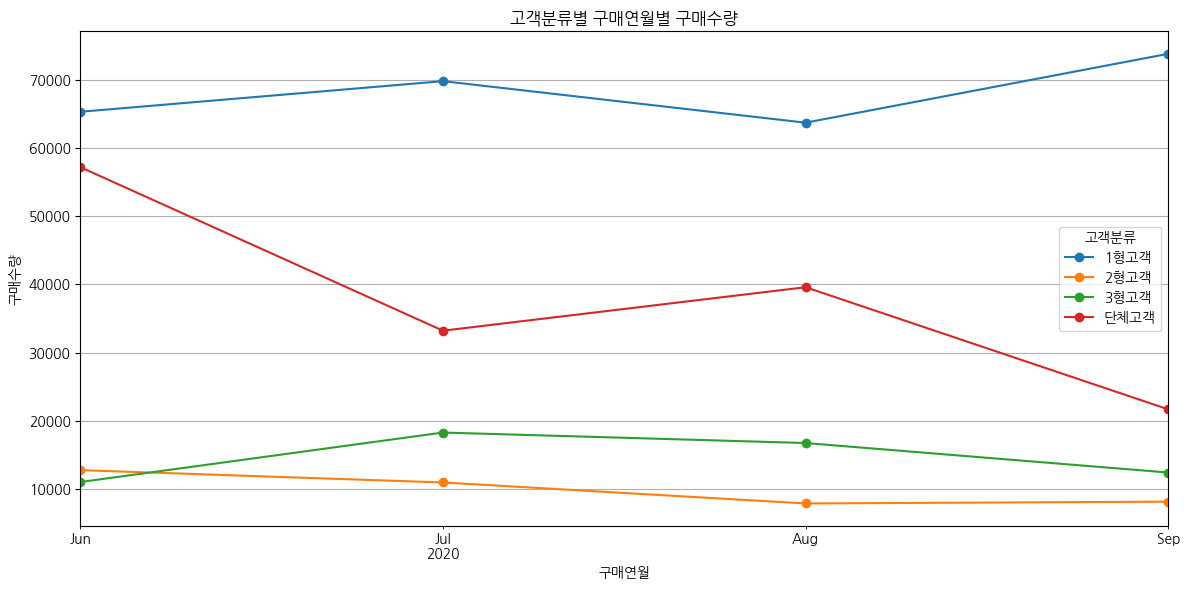

In [11]:
# EDA1: 고객분류별 구매연월별 구매수량 시각화

# 고객분류별 구매연월별 구매수량 집계
trend = train_df.groupby(["고객분류", "구매연월"])["구매수량"].sum().unstack(0)

# 시각화
trend.plot(figsize=(12, 6), marker='o')
plt.title("고객분류별 구매연월별 구매수량")
plt.legend(title="고객분류")
plt.xlabel("구매연월")
plt.ylabel("구매수량")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# EDA1 결과: 단체고객은 가중치가 있는 시간스코어 변수 생성

# 1형고객, 2형고객, 3형고객: 전체적으로 비슷함
# 단체고객: 점점 낮아짐

# 고객분류, 구매연월 조합 생성
month_order_df = (
    train_df[["고객분류", "구매연월"]]
    .drop_duplicates()
    .copy()
)

# 구매연월 순서 부여
month_order_df["연월순서"] = month_order_df.groupby("고객분류")["구매연월"].rank(method="dense").astype(int)

# 단체고객만 가중치 적용
month_order_df["시간스코어"] = month_order_df.apply(
    lambda row: row["연월순서"] * 1.5 if row["고객분류"] == "단체고객" else row["연월순서"],
    axis=1
)

# 적용
train_df = train_df.merge(month_order_df[["고객분류", "구매연월", "시간스코어"]], on=["고객분류", "구매연월"], how="left")

max_scores = month_order_df.groupby("고객분류")["시간스코어"].max()
test_df["시간스코어"] = test_df["고객분류"].map(max_scores)

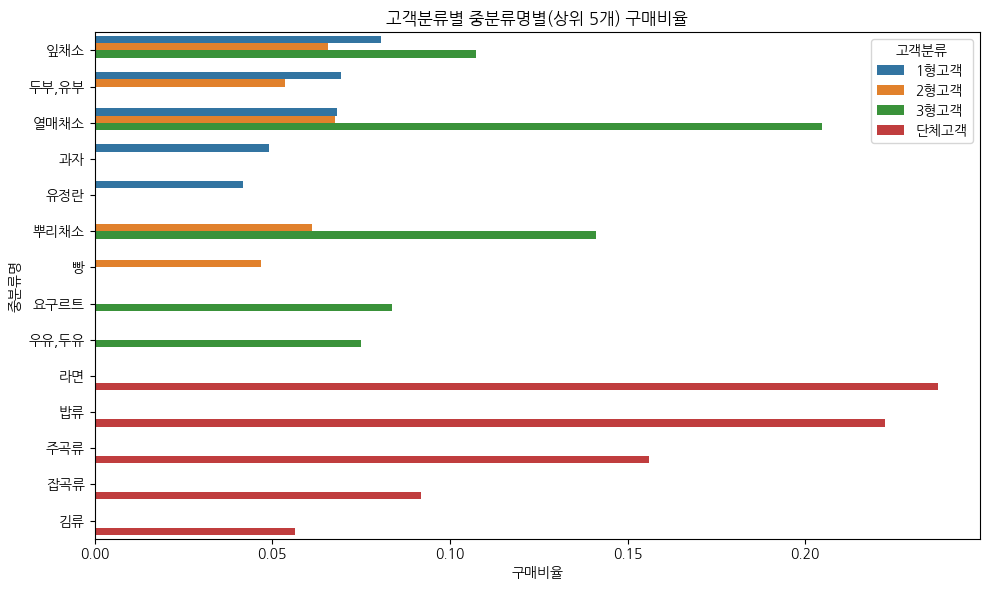

In [13]:
# EDA2: 고객분류별 중분류명별(상위 5개) 구매비율 시각화

# 고객분류별 중분류명별 구매수량 집계
grouped_sum = train_df.groupby(["고객분류", "중분류명"])["구매수량"].sum().reset_index()

# 고객분류별 구매수량 집계
total_sum = grouped_sum.groupby("고객분류")["구매수량"].sum().reset_index()
total_sum = total_sum.rename(columns={"구매수량": "총구매수량"})

# 고객분류별 중분류 비율 계산
ratio_df = grouped_sum.merge(total_sum, on="고객분류", how='inner')
ratio_df ["구매비율"] = ratio_df ["구매수량"] / ratio_df ["총구매수량"]

train_df = train_df.merge(
    ratio_df[["고객분류", "중분류명", "구매비율"]],
    on=["고객분류", "중분류명"],
    how="left"
)

test_df = test_df.merge(
    ratio_df[["고객분류", "중분류명", "구매비율"]],
    on=["고객분류", "중분류명"],
    how="left"
)

# 없는 조합은 0으로 채움
test_df["구매비율"] = test_df["구매비율"].fillna(0)

# 고객분류별 중분류명(상위 5개) 추출
top5 = (
    train_df.groupby(["고객분류", "중분류명"])["구매비율"]
    .mean()
    .reset_index()
    .sort_values(["고객분류", "구매비율"], ascending=[True, False])
    .groupby("고객분류")
    .head(5)
)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=top5, x="구매비율", y="중분류명", hue="고객분류")
plt.title("고객분류별 중분류명별(상위 5개) 구매비율")
plt.legend(title="고객분류")
plt.xlabel("구매비율")
plt.ylabel("중분류명")
plt.tight_layout()
plt.show()

In [14]:
# EDA2 결과 : 상위 5개 중분류명 가중치 변수 생성

# 1형고객, 2형고객: 중분류명에 대하여 고르게 분포
# 3형고객, 단체고객: 특정 중분류명에 집중 분포

# 고객분류별 구매비율 기준으로 정렬
ratio_df = ratio_df.sort_values(["고객분류", "구매비율"], ascending=[True, False])

# 순위 부여
ratio_df["순위"] = ratio_df.groupby("고객분류")["구매비율"].rank(method="first", ascending=False)

# 고객유형별 점수 매핑
def rank_to_score(row):
    rank = row["순위"]
    customer_type = row["고객분류"]

    if customer_type in ["1형고객", "2형고객"]:
        score_map = {1: 1.0, 2: 0.9, 3: 0.8, 4: 0.7, 5: 0.6}
    else:
        score_map = {1: 1.0, 2: 0.7, 3: 0.5, 4: 0.3, 5: 0.1}

    return score_map.get(rank, 0.0)

ratio_df["고객중분류선호점수"] = ratio_df.apply(rank_to_score, axis=1)

# 적용
train_df = train_df.merge(
    ratio_df[["고객분류", "중분류명", "고객중분류선호점수"]],
    on=["고객분류", "중분류명"],
    how="left"
)
test_df = test_df.merge(
    ratio_df[["고객분류", "중분류명", "고객중분류선호점수"]],
    on=["고객분류", "중분류명"],
    how="left"
)

# 없는 조합은 0으로 채우기
train_df["고객중분류선호점수"] = train_df["고객중분류선호점수"].fillna(0)
test_df["고객중분류선호점수"] = test_df["고객중분류선호점수"].fillna(0)

In [15]:
# EDA3: 고객분류별 고객별 상품개수 평균

diversity = (
    train_df.groupby(["고객분류", "고객번호"])["상품번호"].nunique()
    .groupby("고객분류")
    .mean()
    .reset_index(name="상품개수평균")
)

print(diversity)

   고객분류     상품개수평균
0  1형고객  26.751564
1  2형고객  99.796610
2  3형고객  20.965497
3  단체고객  91.750000


In [16]:
# EDA3 결과: 다양성 변수 생성

# 1형고객, 3형고객: 고정된 상품 구매
# 2형고객, 단체고객: 다양한 상품 구매

# 고객번호별 구매한 상품개수(다양성) 계산
cust_diversity = (
    train_df.groupby(["고객번호"])["상품번호"]
    .nunique()
    .reset_index(name="고객별상품개수")
)

# 적용
train_df = train_df.merge(cust_diversity, on="고객번호", how="left")
test_df = test_df.merge(cust_diversity, on="고객번호", how="left")

# 없는 조합은 0으로 채우기
test_df["고객별상품개수"].fillna(0, inplace=True)

<ipython-input-16-2c25f340646f>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["고객별상품개수"].fillna(0, inplace=True)


In [17]:
# EDA4: 고객분류별 고객별 상품별 구매수

# 고객분류별 고객별 상품별 구매수
reorder = train_df.groupby(["고객분류", "고객번호", "상품번호"]).size().reset_index(name="구매수")

# 재구매 여부
reorder["재구매"] = reorder["구매수"] >= 2

# 고객분류별 재구매 평균
reorder_rate = reorder.groupby("고객분류")["재구매"].mean().reset_index(name="재구매율")

print(reorder_rate)

   고객분류      재구매율
0  1형고객  0.271589
1  2형고객  0.460258
2  3형고객  0.253866
3  단체고객  0.446619


In [18]:
# EDA4 결과: 재구매율 변수 생성

# 1형고객, 3형고객: 재구매율 낮음
# 2형고객, 단체고객: 재구매율 높음

train_df = train_df.merge(
    reorder[["고객번호", "상품번호", "재구매"]],
    on=["고객번호", "상품번호"],
    how="left"
)

test_df = test_df.merge(
    reorder[["고객번호", "상품번호", "재구매"]],
    on=["고객번호", "상품번호"],
    how="left"
)

# 없는 조합은 0으로 채우기
test_df["재구매"] = test_df["재구매"].fillna(0).astype(int)

In [19]:
# EDA5: 고객분류별 고객별 구매간격 평균

# 고객별 구매간격 평균
gap_df = (
    train_df.sort_values(by=["고객번호", "구매일자"])
    .groupby("고객번호")["구매일자"]
    .apply(lambda x: x.diff().dt.days.mean())
    .reset_index(name="구매간격평균")
)

# 고객분류 연결
cust_type_map = train_df[["고객번호", "고객분류"]].drop_duplicates()
gap_result = gap_df.merge(cust_type_map, on="고객번호")

# 고객분류별 구매간격평균
gap_result = gap_result.groupby("고객분류")["구매간격평균"].mean().reset_index()

print(gap_result)

   고객분류    구매간격평균
0  1형고객  4.607993
1  2형고객  2.975397
2  3형고객  1.950851
3  단체고객  2.052467


In [20]:
# EDA5 결과 : 구매간격평균 변수 생성

# 1형고객: 긴 구매간격
# 2형고객, 3형고객, 단체고객 : 짧은 구매간격

# 적용
train_df = train_df.merge(gap_df, on="고객번호", how="left")
test_df = test_df.merge(gap_df, on="고객번호", how="left")

# 없는 조합은 0으로 채우기
test_df["구매간격평균"] = test_df["구매간격평균"].fillna(0)

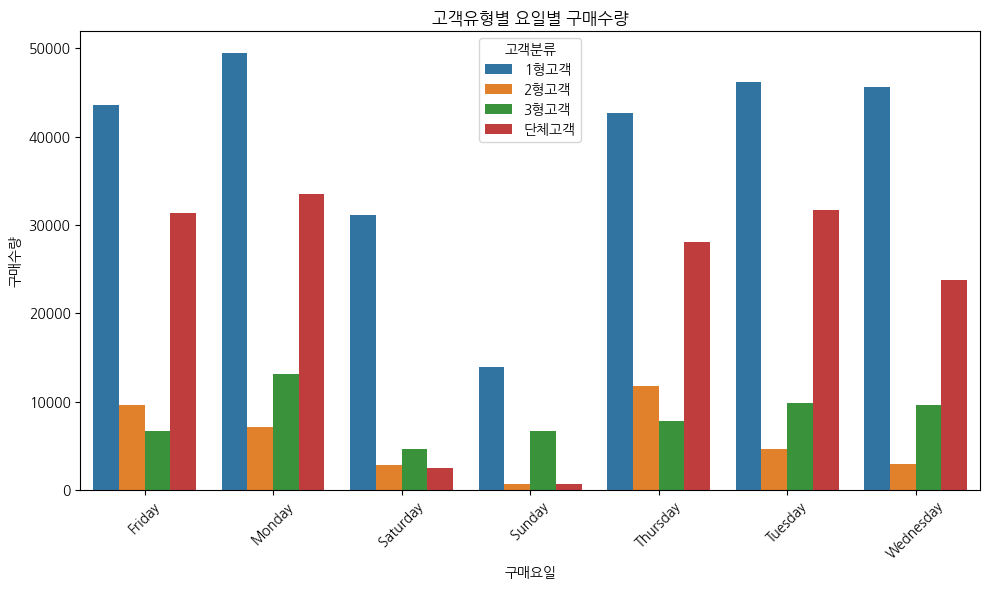

In [21]:
# EDA6: 고객분류별 요일별 구매수량

# 요일 파생변수 생성
weekday_dist = train_df.copy()
weekday_dist["구매요일"] = weekday_dist["구매일자"].dt.day_name()

# 고객분류별 요일별 구매수량 합계
weekday_dist = weekday_dist.groupby(["고객분류", "구매요일"])["구매수량"].sum().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_dist, x="구매요일", y="구매수량", hue="고객분류")
plt.title("고객유형별 요일별 구매수량")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# EDA6 결과: 휴일여부 변수 생성

# 휴일여부 파생변수 생성
train_df["휴일여부"] = train_df["구매일자"].dt.weekday.isin([5, 6]).astype(int)
test_df["휴일여부"] = test_df["구매일자"].dt.weekday.isin([5, 6]).astype(int)

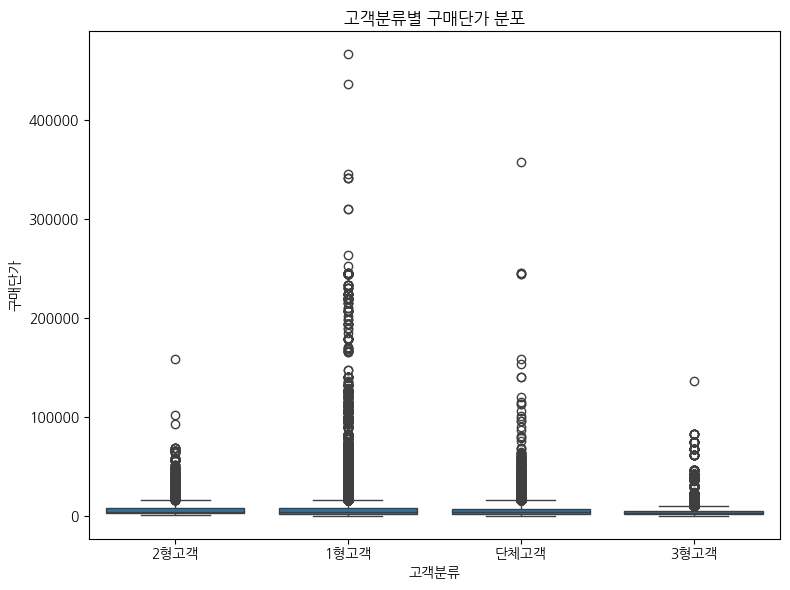

In [23]:
# EDA7: 고객분류별 구매단가

# 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(data=train_df, x="고객분류", y="구매단가")
plt.title("고객분류별 구매단가 분포")
plt.xlabel("고객분류")
plt.ylabel("구매단가")
plt.tight_layout()
plt.show()

In [24]:
# EDA 7 결과 : 로그 구매단가 변수 생성

# 1형고객, 단체고객 : 고단가 품목 구매

import numpy as np

train_df["log_구매단가"] = np.log1p(train_df["구매단가"])
test_df["log_구매단가"] = np.log1p(test_df["구매단가"])

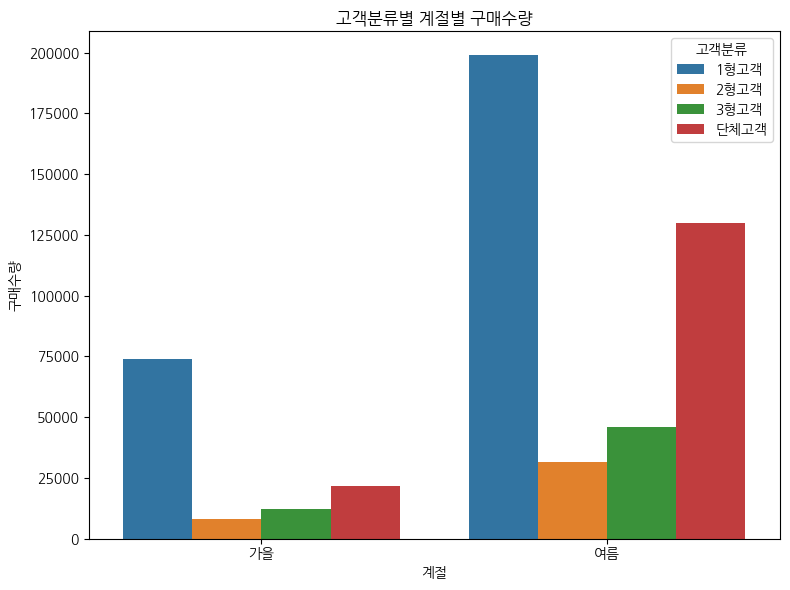

In [25]:
# EDA 8: 고객분류별 계절별 구매수

# 계절 파생변수 생성
def assign_season(month):
    if month in [12, 1, 2]:
        return "겨울"
    elif month in [3, 4, 5]:
        return "봄"
    elif month in [6, 7, 8]:
        return "여름"
    else:
        return "가을"

train_df["계절"] = train_df["구매일자"].dt.month.apply(assign_season)


# 고객분류별 계절별 구매수량 합계
seasonal = train_df.groupby(["고객분류", "계절"])["구매수량"].sum().reset_index()

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(data=seasonal, x="계절", y="구매수량", hue="고객분류")
plt.title("고객분류별 계절별 구매수량")
plt.xlabel("계절")
plt.ylabel("구매수량")
plt.tight_layout()
plt.show()

In [26]:
# EDA7 결과: 계절 변수 생성

test_df["계절"] = test_df["구매일자"].dt.month.apply(assign_season)

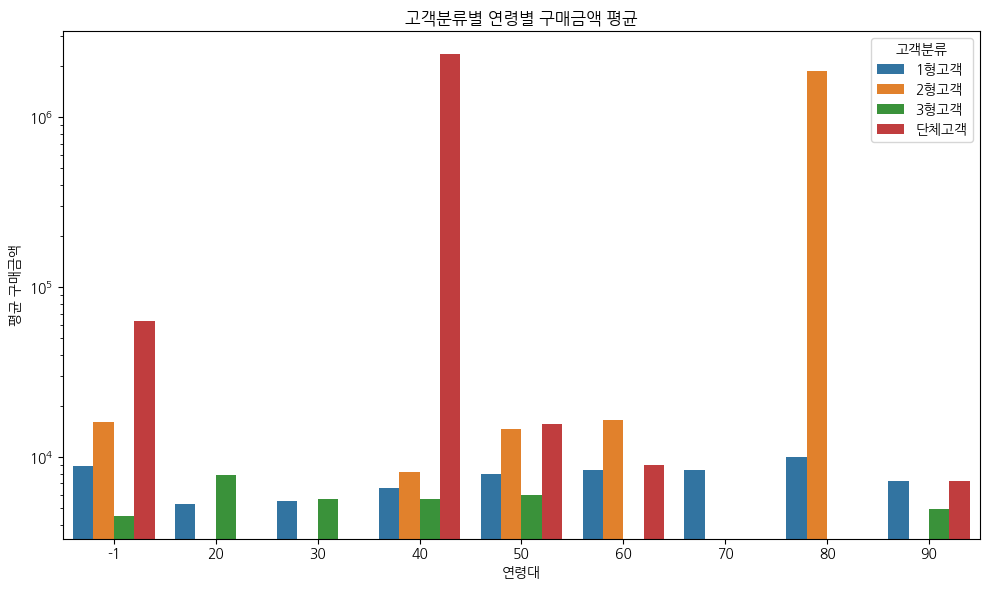

In [27]:
# EDA8: 고객분류별 연령별 구매금액 평균

import pandas as pd
from datetime import datetime

# 오늘 기준 연도
def classify_age_group(birth, current_year=datetime.today().year):
    if pd.isna(birth):
        return -1

    birth_year = birth.year
    age = current_year - birth_year + 1

    if age >= 90:
        return 90
    else:
        return (age // 10) * 10

train_df["연령대"] = train_df["생년월일"].apply(classify_age_group)

# 고객분류별 연령대별 구매금액 평균
summary = (
    train_df.groupby(["고객분류", "연령대"])
    .agg(
        평균구매금액=("실제구매액", "mean")
    )
    .reset_index()
)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x="연령대", y="평균구매금액", hue="고객분류")
plt.yscale("log")
plt.title("고객분류별 연령별 구매금액 평균")
plt.xlabel("연령대")
plt.ylabel("평균 구매금액")
plt.legend(title="고객분류")
plt.tight_layout()
plt.show()

In [28]:
# EDA8 결과: 2형고객, 단체고객 연령대 가중치 변수 생성

# 2형고객, 단체고객 연령대 중요

test_df["연령대"] = test_df["생년월일"].apply(classify_age_group)

train_df["연령대가중치"] = train_df.apply(
    lambda row: row["연령대"] if row["고객분류"] in ["2형고객", "단체고객"] else 0,
    axis=1
)

test_df["연령대가중치"] = test_df.apply(
    lambda row: row["연령대"] if row["고객분류"] in ["2형고객", "단체고객"] else 0,
    axis=1
)

## 6. Train/Test 분리 및 데이터 인코딩

In [29]:
from sklearn.preprocessing import OrdinalEncoder

# 예측 변수
y_train = train_df["구매수량"]
y_test = test_df["구매수량"]

# 제거할 컬럼
drop_cols = ["고객번호", "구매일자", "구매수량", "생년월일", "가입일", "중분류명", "상품명", "매입단가", "판매가"]

X_train = train_df.drop(columns=drop_cols)
X_test = test_df.drop(columns=drop_cols)

#Ordinal Encoder
label_cols = ["매장", "업장구분", "고객분류", "고객상태", "대분류명", "소분류명"]

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train[label_cols] = oe.fit_transform(X_train[label_cols])
X_test[label_cols] = oe.transform(X_test[label_cols])

# One-Hot Encoding (계절)
X_train = pd.get_dummies(X_train, columns=["계절"])
X_test = pd.get_dummies(X_test, columns=["계절"])

X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

X_train["구매연월"] = X_train["구매연월"].astype(str).str.replace("-", "").astype(int)
X_test["구매연월"] = X_test["구매연월"].astype(str).str.replace("-", "").astype(int)

X_train["재구매"] = X_train["재구매"].astype(int)
X_test["재구매"] = X_test["재구매"].astype(int)

## 7. 데이터 모델링

In [30]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 정의
model = LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    learning_rate=0.02,
    num_leaves=31,
    random_state=42,
    n_estimators=150
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
preds = model.predict(X_test)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, preds))

# 결과 출력
print(f"RMSE: {rmse:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.070120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2266
[LightGBM] [Info] Number of data points in the train set: 292954, number of used features: 23
[LightGBM] [Info] Start training from score 1.784208
RMSE: 6.83


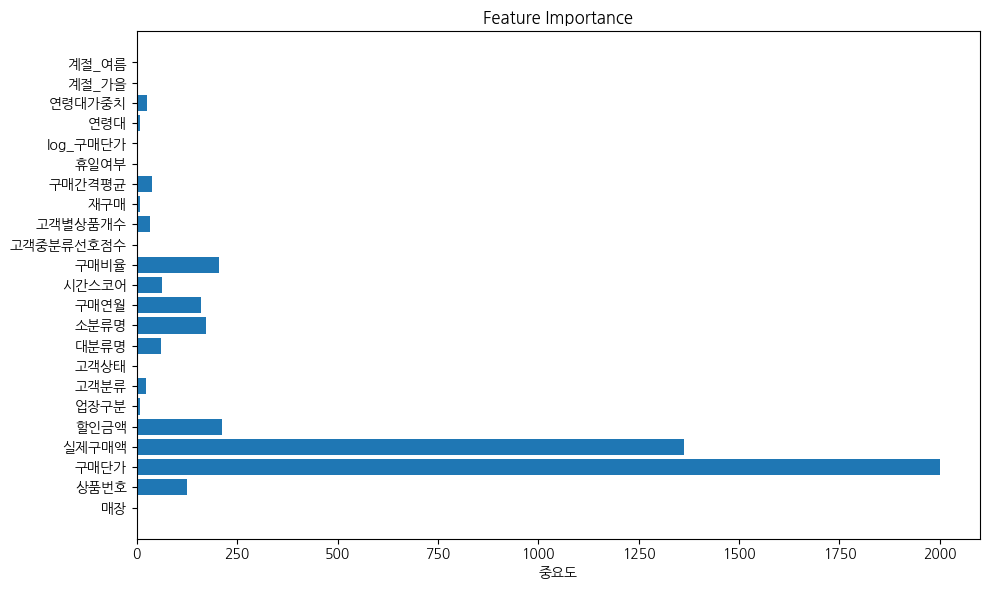

In [31]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_train.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.title("Feature Importance")
plt.xlabel("중요도")
plt.tight_layout()
plt.show()

In [32]:
# 제거할 변수 목록
drop_cols = ["계절_여름", "계절_가을", "log_구매단가", "휴일여부", "고객중분류선호점수", "고객상태", "매장"]

# 제거
X_train_reduced = X_train.drop(columns=drop_cols, errors="ignore")
X_test_reduced = X_test.drop(columns=drop_cols, errors="ignore")

# 모델 정의
model_re = LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    learning_rate=0.02,
    num_leaves=31,
    random_state=42,
    n_estimators=150
)

# 모델 학습
model_re.fit(X_train_reduced, y_train)

# 예측
preds = model_re.predict(X_test_reduced)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_test, preds))

print(f"LightGBM 성능 평가 (변수 제거 후)")
print(f"RMSE: {rmse:.2f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1983
[LightGBM] [Info] Number of data points in the train set: 292954, number of used features: 16
[LightGBM] [Info] Start training from score 1.784208
LightGBM 성능 평가 (변수 제거 후)
RMSE: 6.83


In [33]:
from sklearn.ensemble import RandomForestRegressor

# 모델 정의
model_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# 모델 학습
model_rf.fit(X_train_reduced, y_train)

# 예측
preds_rf = model_rf.predict(X_test_reduced)

# 성능 평가
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))

print("RandomForest RMSE:", round(rmse_rf, 2))

RandomForest RMSE: 2.39


## 8. 결과

In [34]:
# 예측값 test_df에 저장
test_df["예측값"] = preds_rf

In [35]:
import numpy as np

# 중분류명별 실제값, 예측값, RMSE 집계
summary_rmse = (
    test_df.groupby("중분류명")
    .apply(lambda x: pd.Series({
        "실제값합": x["구매수량"].sum(),
        "예측값합": x["예측값"].sum(),
        "RMSE": np.sqrt(np.mean((x["예측값"] - x["구매수량"]) ** 2))
    }))
    .reset_index()
    .sort_values("RMSE", ascending=False)
)

# 결과 출력
print(" RMSE 기준 예측이 어려운 중분류 Top 10")
display(summary_rmse.head(10))

print("\nRMSE 기준 예측이 잘 된 중분류 Top 10")
display(summary_rmse.tail(10))

 RMSE 기준 예측이 어려운 중분류 Top 10


<ipython-input-35-f4f45f3c6cbb>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


,중분류명,실제값합,예측값합,RMSE
58,밥류,8855.0,8030.498922,30.465981
39,농산 선물세트,97.0,175.584258,13.822740
76,엑기스/건강즙,399.0,504.692721,5.637418
63,생활용품,1006.0,1039.324253,3.893367
48,라면,11870.0,11550.211366,3.519406
25,김류,3316.0,3473.674167,2.411909
93,잎채소,17713.0,18210.436771,1.407164
89,음료,4040.0,3873.822329,1.277347
46,"두부,유부",9535.0,9417.117265,0.566769
87,유정란,6829.0,6865.055992,0.522790



RMSE 기준 예측이 잘 된 중분류 Top 10


,중분류명,실제값합,예측값합,RMSE
75,"어포,기타",11.0,11.078093,0.024483
20,기능성/색조,142.0,143.925893,0.023514
28,냉동갑각류,70.0,70.792847,0.022463
34,냉장가공기타,185.0,187.358751,0.021445
78,열대과일,67.0,67.600160,0.020645
83,와인류,3.0,3.043927,0.014642
43,당도보장과일,6.0,6.086484,0.014414
104,주곡(어린이집),4.0,4.055112,0.013893
123,화분,4.0,4.049376,0.012344
124,화장품,17.0,17.172159,0.011353


In [36]:
# 고객분류별 실제값, 예측값, RMSE 집계

cust_summary = (
    test_df.groupby("고객분류")
    .apply(lambda x: pd.Series({
        "실제값합": x["구매수량"].sum(),
        "예측값합": x["예측값"].sum(),
        "RMSE": np.sqrt(np.mean((x["예측값"] - x["구매수량"]) ** 2))
    }))
    .reset_index()
    .sort_values("RMSE", ascending=False)
)

print("RMSE 기준 고객분류별 예측 성능")
display(cust_summary)

RMSE 기준 고객분류별 예측 성능


<ipython-input-36-1f5a2a356839>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


,고객분류,실제값합,예측값합,RMSE
3,단체고객,27483.0,26341.446284,11.500153
1,2형고객,20066.0,20054.693278,1.386458
0,1형고객,122359.0,122989.922872,0.596017
2,3형고객,22927.0,23075.121054,0.144099
